<a href="https://colab.research.google.com/github/ShrivastavaPrakash/Computer-Vision-in-Satellite-imagery/blob/main/Complete_capstone_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline


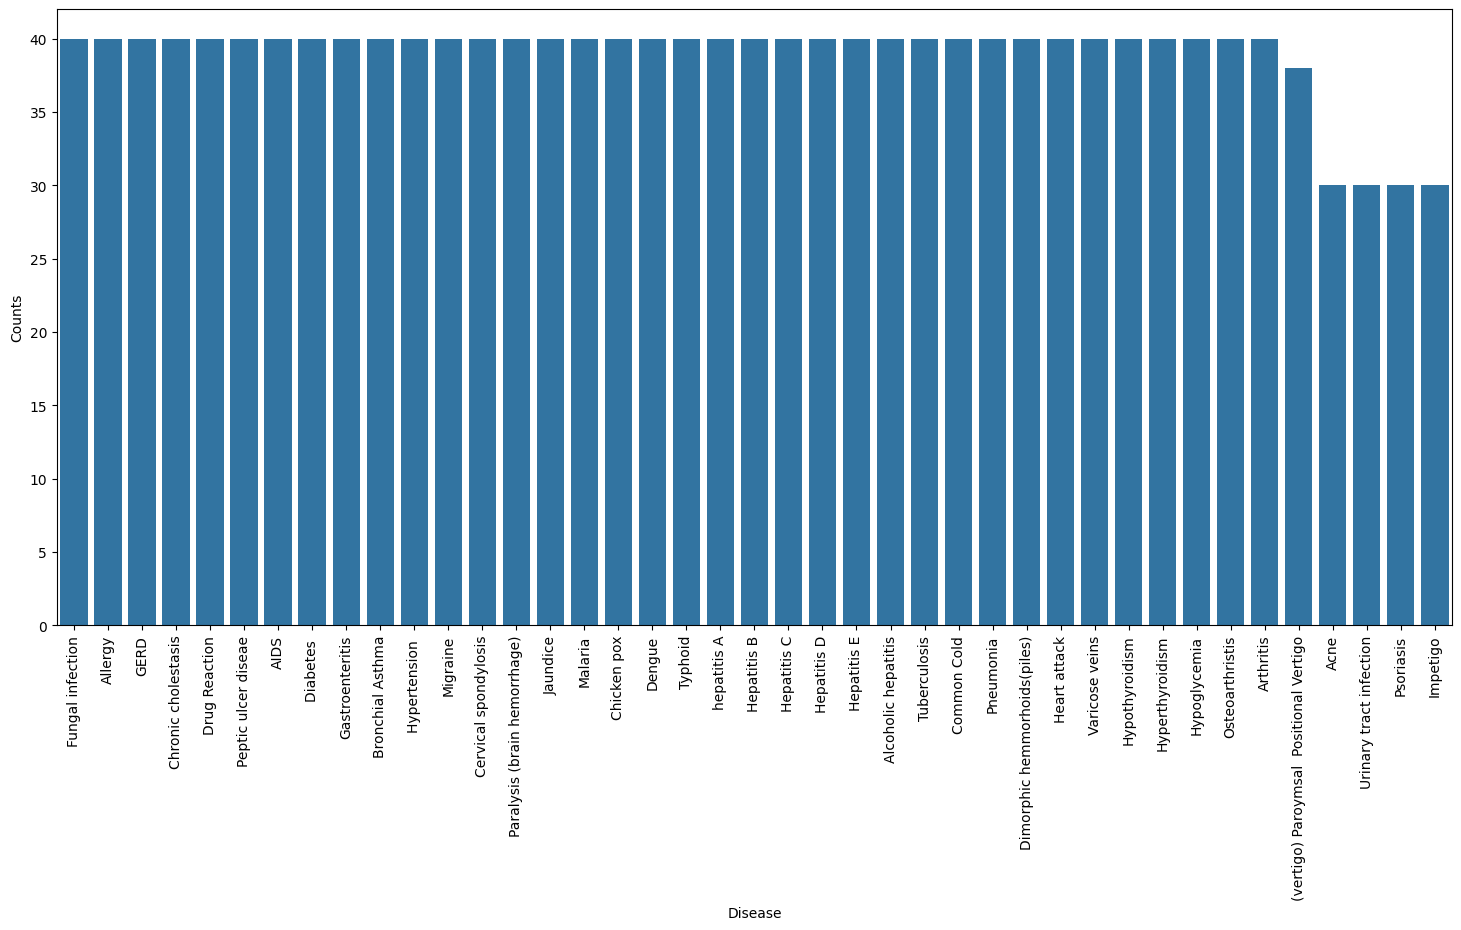

In [ ]:

DATA_PATH = "Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
	"Disease": disease_counts.index,
	"Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])


In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (1278, 52), (1278,)
Test: (320, 52), (320,)


In [ ]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
	return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
	"SVC":SVC(),
	"Gaussian NB":GaussianNB(),
	"Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
	model = models[model_name]
	scores = cross_val_score(model, X, y, cv = 10,
							n_jobs = -1,
							scoring = cv_scoring)
	print("=="*30)
	print(model_name)
	print(f"Scores: {scores}")
	print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [0.9375     0.9625     0.98125    0.95625    0.9375     0.9625
 0.96875    0.95       0.95597484 0.96855346]
Mean Score: 0.9580778301886792
Gaussian NB
Scores: [0.91875    0.94375    0.96875    0.93125    0.9375     0.9375
 0.95       0.94375    0.93081761 0.96226415]
Mean Score: 0.9424331761006289
Random Forest
Scores: [0.94375    0.9625     0.98125    0.95625    0.94375    0.9625
 0.96875    0.95625    0.95597484 0.96855346]
Mean Score: 0.9599528301886793


Accuracy on train data by SVM Classifier: 95.93114241001565
Accuracy on test data by SVM Classifier: 95.3125


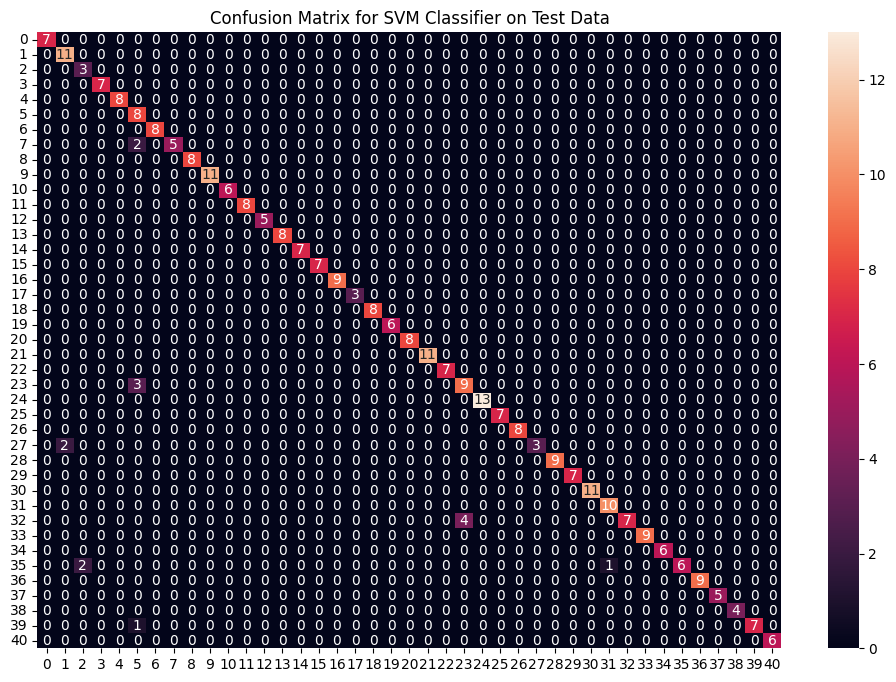

Accuracy on train data by Naive Bayes Classifier: 94.83568075117371
Accuracy on test data by Naive Bayes Classifier: 94.375


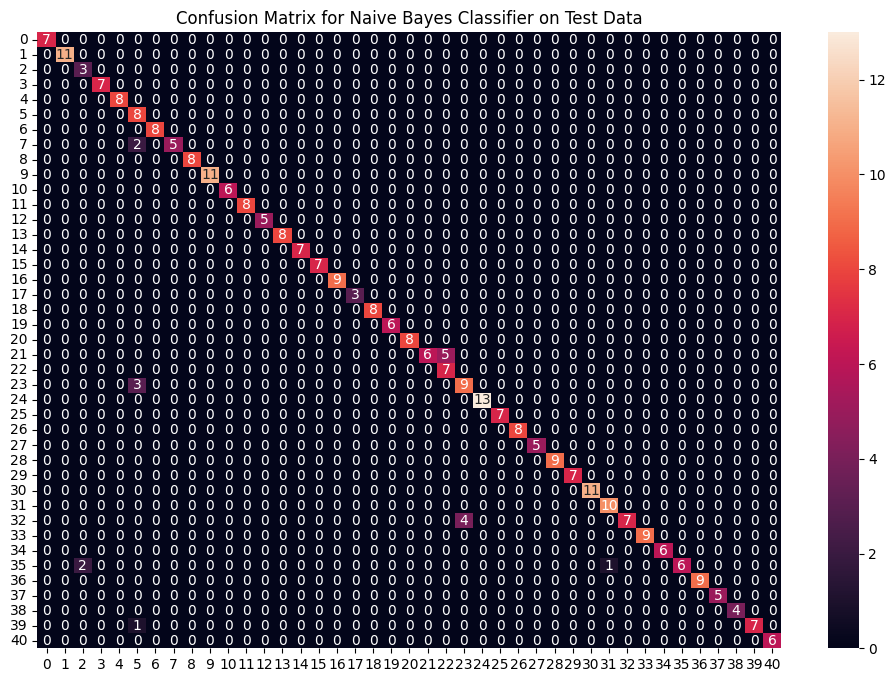

Accuracy on train data by Random Forest Classifier: 96.0093896713615
Accuracy on test data by Random Forest Classifier: 95.9375


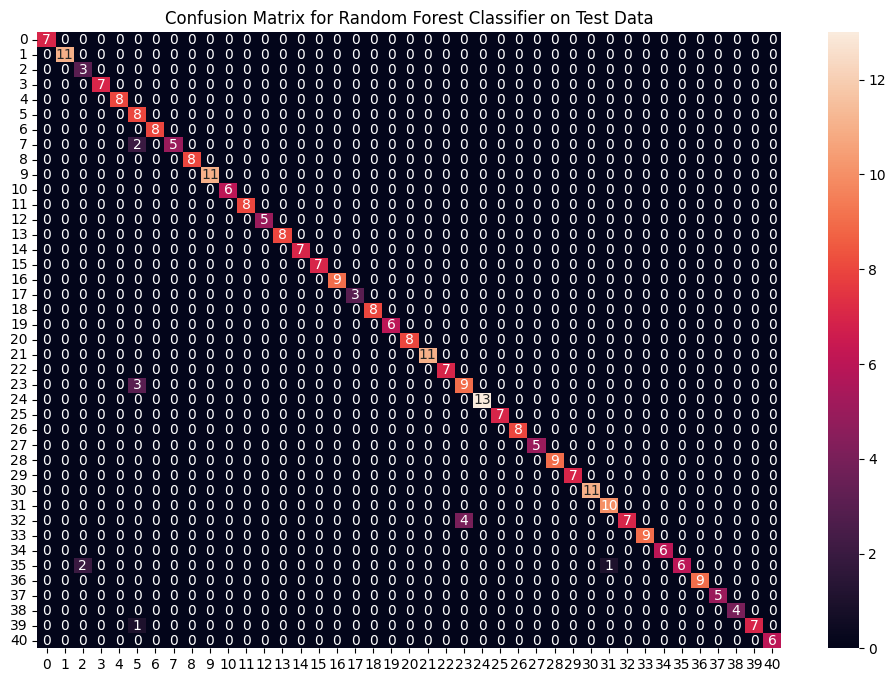

In [ ]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


In [ ]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Reading the test data
test_data = pd.read_csv("Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [mode([i,j,k])[0][0] for i,j,
			k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()



IndexError: invalid index to scalar variable.

Accuracy on Test dataset by the combined model: 2.5031289111389237


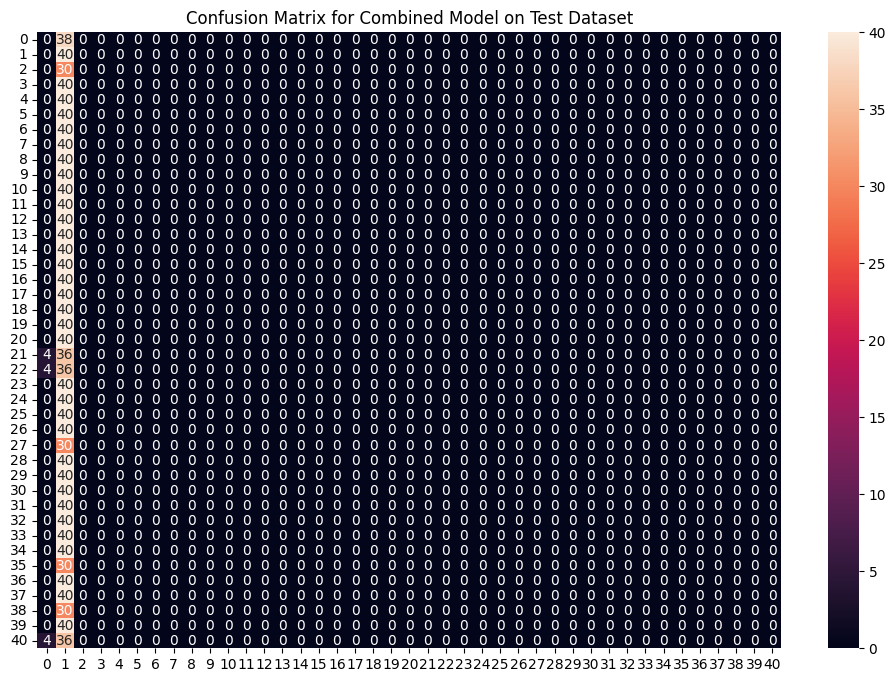

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom mode function
def custom_mode(lst):
    mode_list = []
    max_count = 0
    for val in lst:
        if lst.count(val) > max_count:
            mode_list = [val]
            max_count = lst.count(val)
        elif lst.count(val) == max_count and val not in mode_list:
            mode_list.append(val)
    return mode_list

# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Reading the test data
test_data = pd.read_csv("Training.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making predictions
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

# Finding the mode predictions
final_preds = []

for i, j, k in zip(svm_preds, nb_preds, rf_preds):
    preds = [i, j, k]
    non_scalar_preds = [p for p in preds if not isinstance(p, (int, float))]

    if len(non_scalar_preds) == len(preds):
        mode_pred = custom_mode(preds)[0]
    elif len(non_scalar_preds) == 0:
        mode_pred = custom_mode(preds)[0]
    else:
        mode_pred = custom_mode(non_scalar_preds)[0]

    final_preds.append(mode_pred)

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


SVC
Scores: [0.9375     0.9625     0.98125    0.95625    0.9375     0.9625
 0.96875    0.95       0.95597484 0.96855346]
Mean Score: 0.9580778301886792
Gaussian NB
Scores: [0.91875    0.94375    0.96875    0.93125    0.9375     0.9375
 0.95       0.94375    0.93081761 0.96226415]
Mean Score: 0.9424331761006289
Random Forest
Scores: [0.94375    0.9625     0.98125    0.95625    0.94375    0.9625
 0.96875    0.95625    0.95597484 0.96855346]
Mean Score: 0.9599528301886793
Decision Tree
Scores: [0.94375    0.9625     0.98125    0.95625    0.94375    0.9625
 0.96875    0.95625    0.95597484 0.96855346]
Mean Score: 0.9599528301886793
KNN
Scores: [0.925      0.9375     0.98125    0.93125    0.94375    0.9625
 0.96875    0.95625    0.95597484 0.95597484]
Mean Score: 0.9518199685534592
Gradient Boosting
Scores: [0.94375    0.9625     0.98125    0.95625    0.94375    0.9625
 0.96875    0.95625    0.95597484 0.96855346]
Mean Score: 0.9599528301886793
XGBoost
Scores: [0.94375    0.9625     0.98125

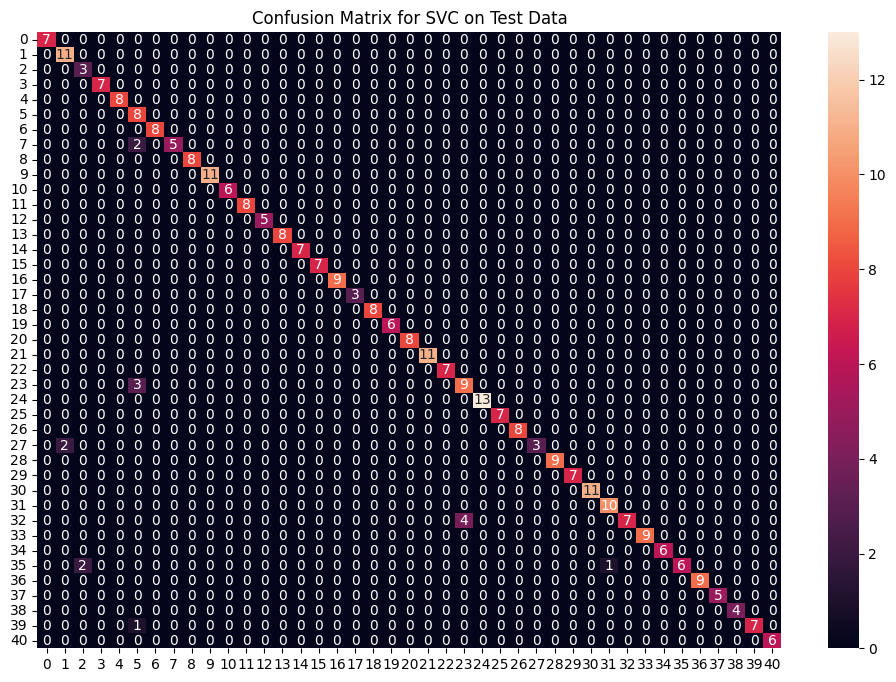

Gaussian NB Train Accuracy: 94.83568075117371
Gaussian NB Test Accuracy: 94.375


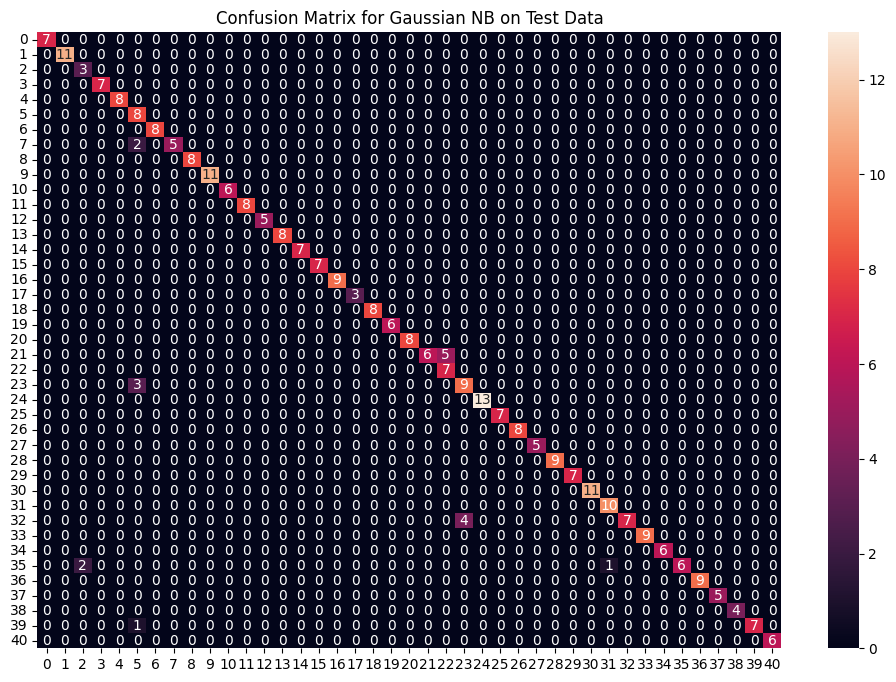

Random Forest Train Accuracy: 96.0093896713615
Random Forest Test Accuracy: 95.9375


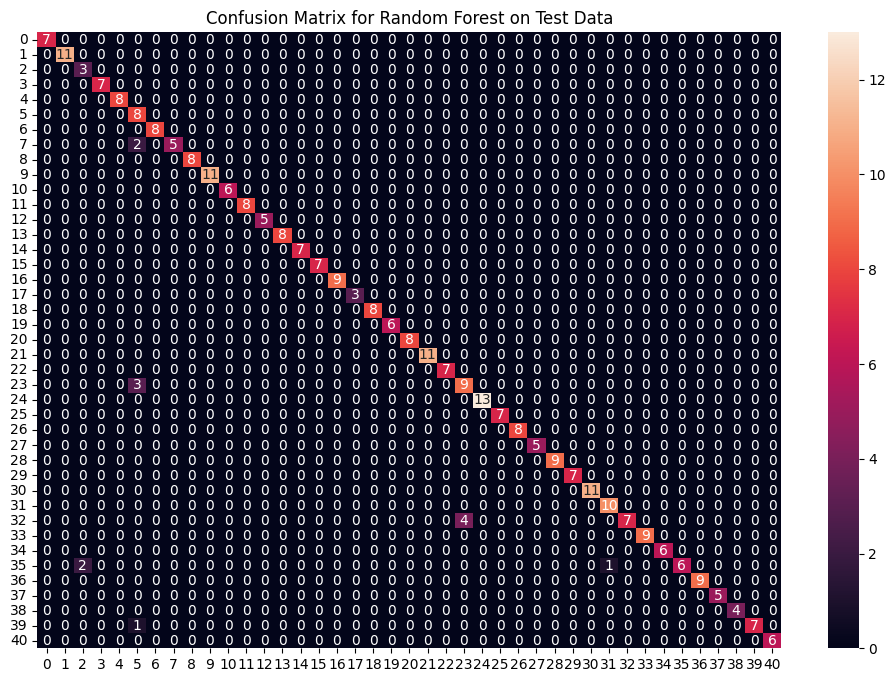

Decision Tree Train Accuracy: 96.0093896713615
Decision Tree Test Accuracy: 94.6875


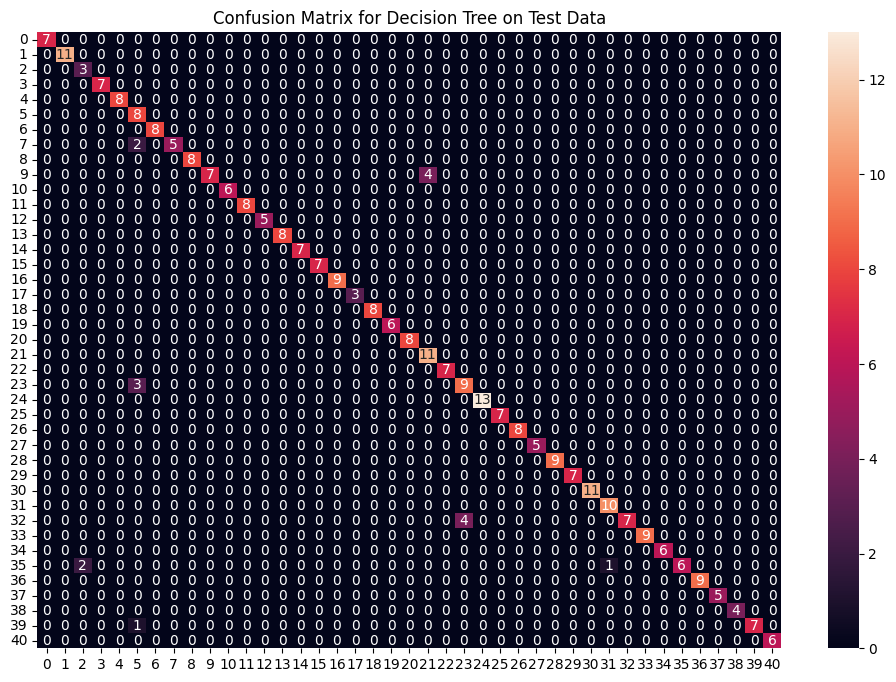

KNN Train Accuracy: 95.93114241001565
KNN Test Accuracy: 95.3125


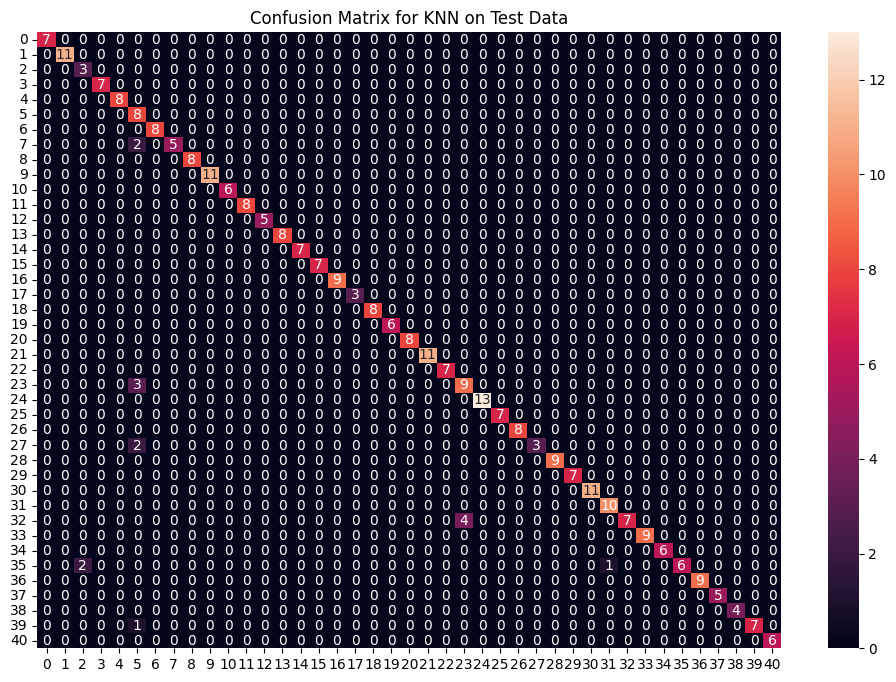

Gradient Boosting Train Accuracy: 96.0093896713615
Gradient Boosting Test Accuracy: 94.6875


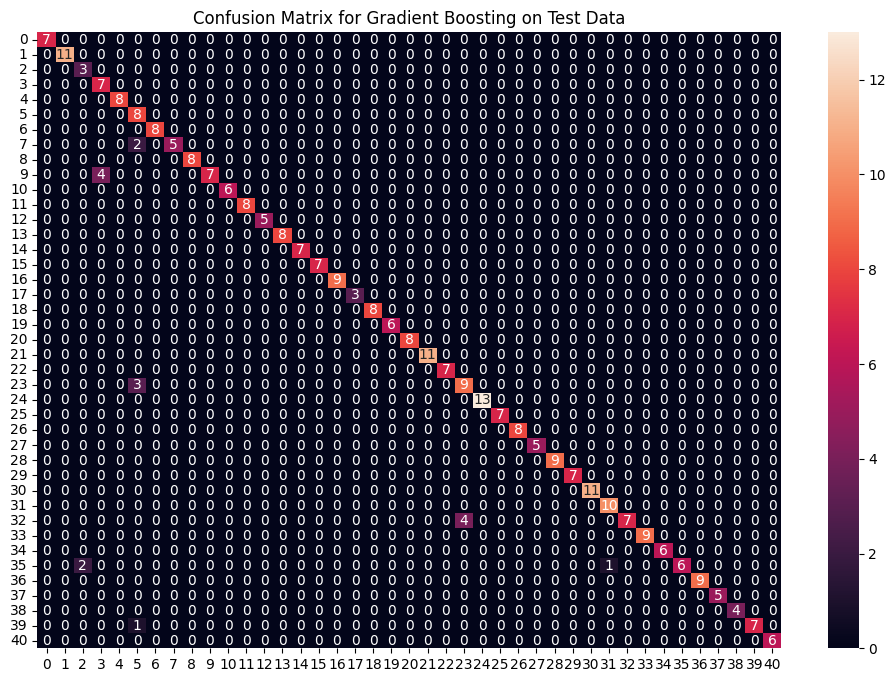

XGBoost Train Accuracy: 96.0093896713615
XGBoost Test Accuracy: 95.9375


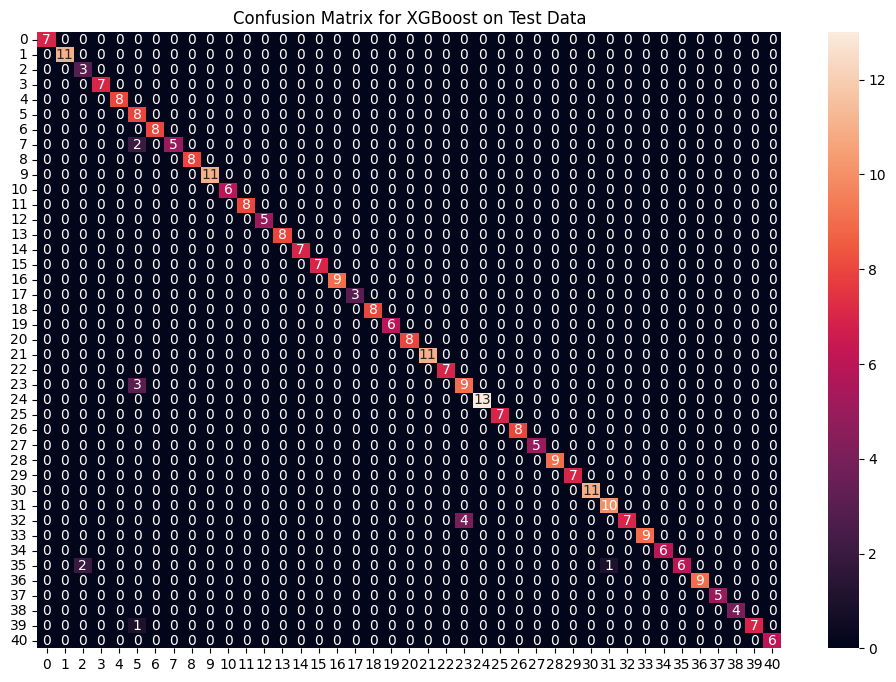

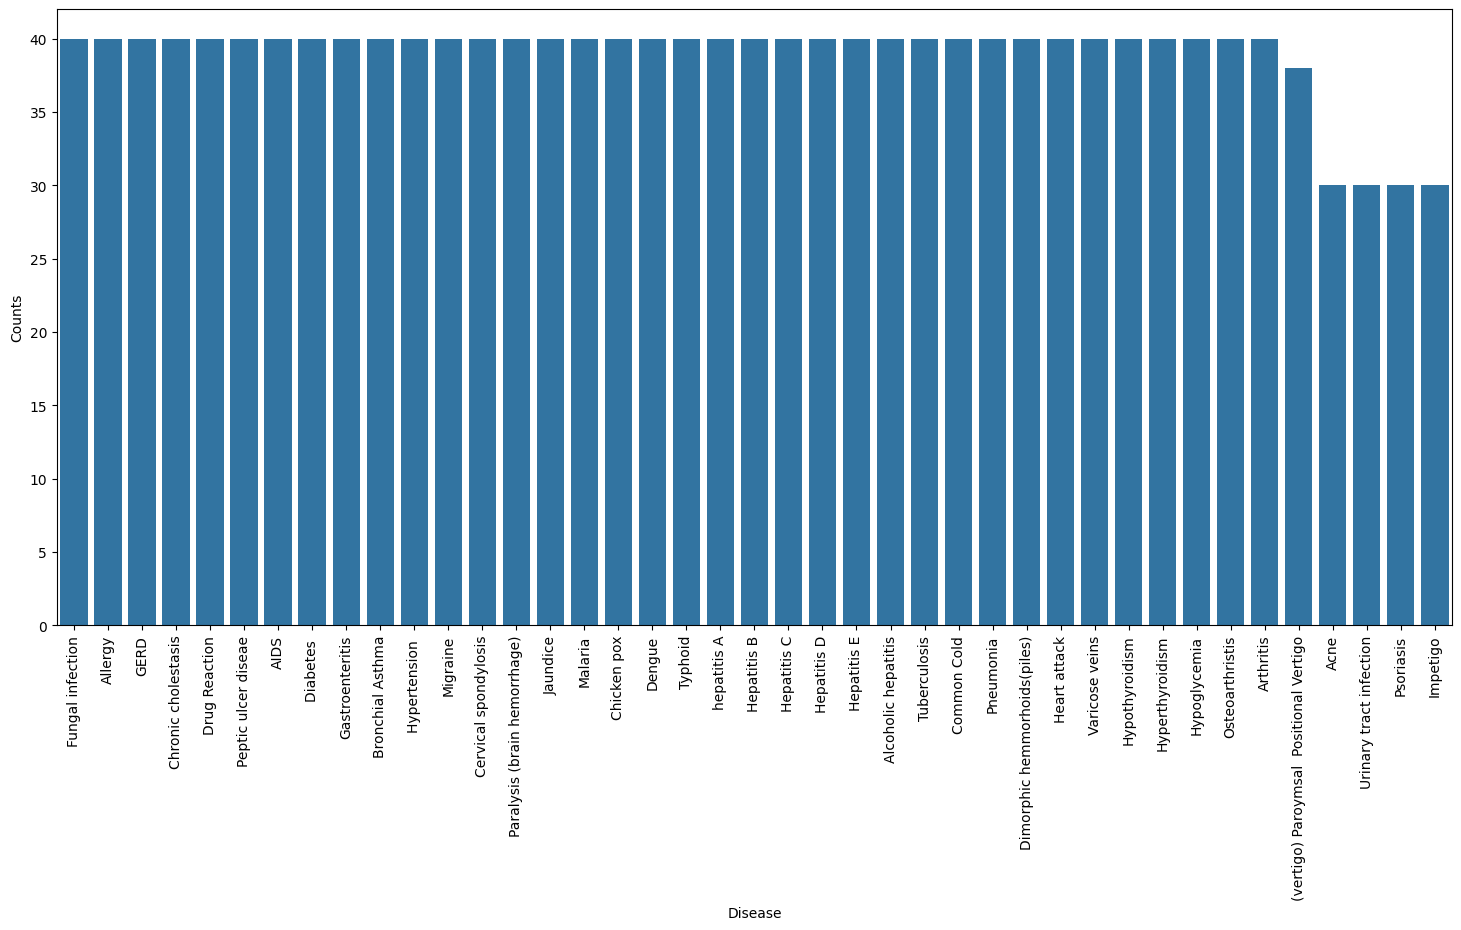

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Reading the train.csv by removing the last column since it's an empty column
DATA_PATH = "Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis=1)

# Encoding the target value into numerical value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24
)

# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18),
    "Decision Tree": DecisionTreeClassifier(random_state=18),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=18),
    "XGBoost": xgb.XGBClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1, scoring=cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

# Training and testing all classifiers
for model_name in models:
    model = models[model_name]
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, model.predict(X_train)) * 100
    test_accuracy = accuracy_score(y_test, preds) * 100

    print(f"{model_name} Train Accuracy: {train_accuracy}")
    print(f"{model_name} Test Accuracy: {test_accuracy}")

    cf_matrix = confusion_matrix(y_test, preds)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cf_matrix, annot=True)
    plt.title(f"Confusion Matrix for {model_name} on Test Data")
    plt.show()

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": encoder.inverse_transform(disease_counts.index),
    "Counts": disease_counts.values
})

plt.figure(figsize=(18, 8))
sns.barplot(x="Disease", y="Counts", data=temp_df)
plt.xticks(rotation=90)
plt.show()


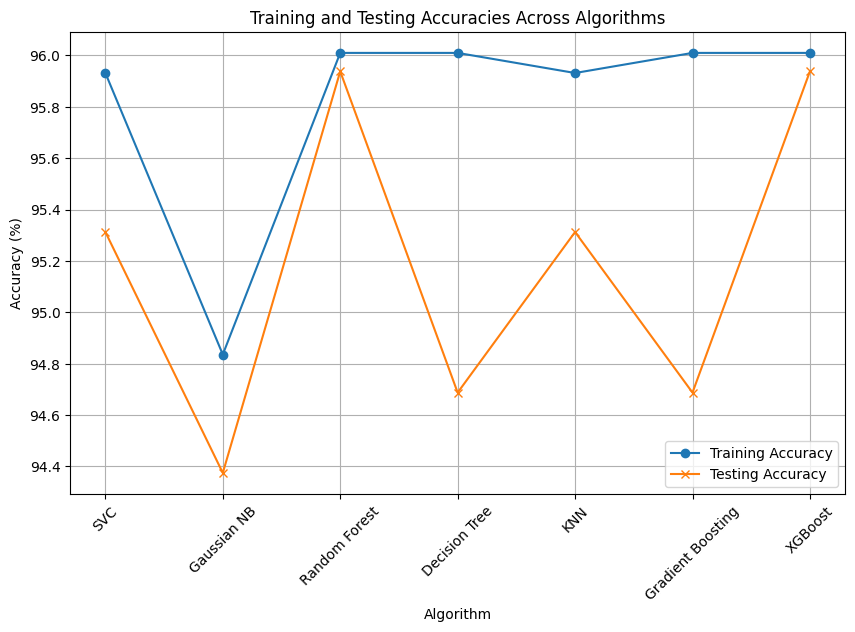

In [ ]:
train_accuracies = []
test_accuracies = []
# Iterate through each model
for model_name in models:
    model = models[model_name]
    # Train the model
    model.fit(X_train, y_train)
    # Calculate training and testing accuracies
    train_accuracy = accuracy_score(y_train, model.predict(X_train)) * 100
    test_accuracy = accuracy_score(y_test, model.predict(X_test)) * 100
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot(models.keys(), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(models.keys(), test_accuracies, label='Testing Accuracy', marker='x')
plt.title('Training and Testing Accuracies Across Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


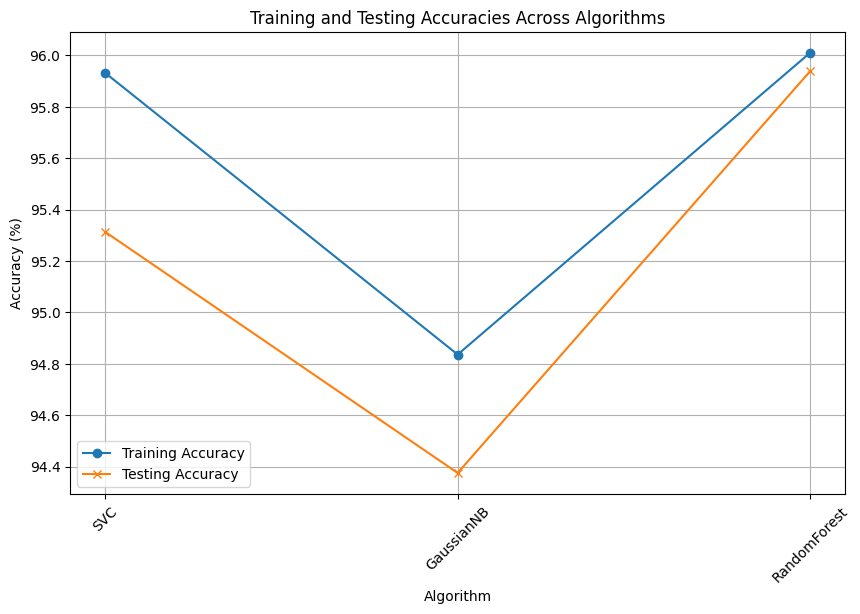

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define models
models = {
    'SVC': SVC(),
    'GaussianNB': GaussianNB(),
    'RandomForest': RandomForestClassifier()
}

train_accuracies = []
test_accuracies = []

# Iterate through each model
for model_name in models:
    model = models[model_name]
    # Train the model
    model.fit(X_train, y_train)
    # Calculate training and testing accuracies
    train_accuracy = accuracy_score(y_train, model.predict(X_train)) * 100
    test_accuracy = accuracy_score(y_test, model.predict(X_test)) * 100
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot(['SVC', 'GaussianNB', 'RandomForest'], train_accuracies, label='Training Accuracy', marker='o')
plt.plot(['SVC', 'GaussianNB', 'RandomForest'], test_accuracies, label='Testing Accuracy', marker='x')
plt.title('Training and Testing Accuracies Across Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


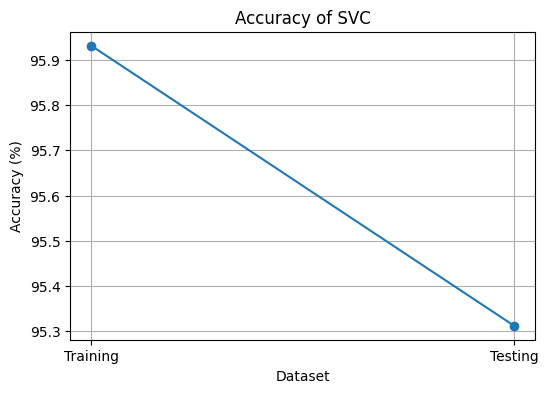

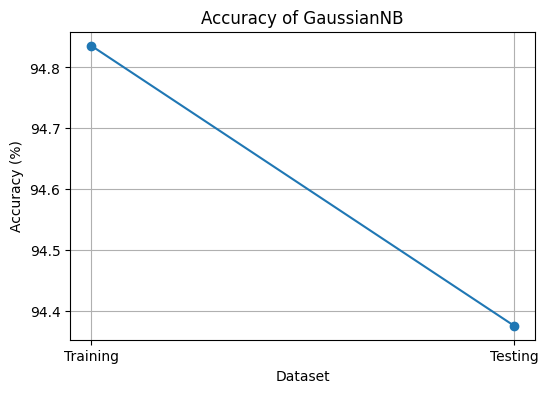

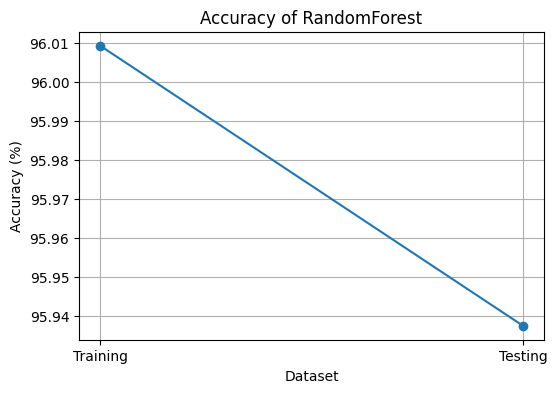

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define models
models = {
    'SVC': SVC(),
    'GaussianNB': GaussianNB(),
    'RandomForest': RandomForestClassifier()
}

# Iterate through each model
for model_name in models:
    model = models[model_name]
    # Train the model
    model.fit(X_train, y_train)
    # Calculate training and testing accuracies
    train_accuracy = accuracy_score(y_train, model.predict(X_train)) * 100
    test_accuracy = accuracy_score(y_test, model.predict(X_test)) * 100

    # Plotting training and testing accuracies for this model
    plt.figure(figsize=(6, 4))
    plt.plot(['Training', 'Testing'], [train_accuracy, test_accuracy], marker='o')
    plt.title(f'Accuracy of {model_name}')
    plt.xlabel('Dataset')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Reading the train.csv by removing the last column since it's an empty column
DATA_PATH = "Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis=1)

# Encoding the target value into numerical value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

# Grouping data by 'prognosis' to get unique diseases and their counts
grouped = data.groupby("prognosis").size().reset_index(name="Unique Aspect")

# Initialize results dictionary
results = {"Disease": [], "NB": [], "K*": [], "DT": [], "SVC": [],
           "RF": [], "GB": [], "XGBoost": [], "Unique Aspect": []}

models = {
    "NB": GaussianNB(),
    "K*": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "SVC": SVC(),
    "RF": RandomForestClassifier(random_state=18),
    "GB": GradientBoostingClassifier(random_state=18),
    "XGBoost": xgb.XGBClassifier(random_state=18)
}

# Iterate over each unique disease and compute accuracy scores
for disease in grouped["prognosis"]:
    disease_data = data[data["prognosis"] == disease]
    X = disease_data.drop("prognosis", axis=1)
    y = disease_data["prognosis"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

    results["Disease"].append(encoder.inverse_transform([disease])[0])
    results["Unique Aspect"].append(grouped[grouped["prognosis"] == disease]["Unique Aspect"].values[0])

    for model_name, model in models.items():
        if len(set(y_train)) > 1:  # Check if there are more than 1 unique class in y_train
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            accuracy = accuracy_score(y_test, preds) * 100
            results[model_name].append(round(accuracy, 2))
        else:
            results[model_name].append("N/A")  # Not applicable when only one class is present

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Reading the train.csv by removing the last column since it's an empty column
DATA_PATH = "Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis=1)

# Grouping data by 'prognosis' to get unique diseases and their representative symptoms
grouped = data.groupby("prognosis").first().reset_index()

# Initialize results dictionary
results = {"Disease": [], "NB": [], "K*": [], "DT": [], "SVC": [],
           "RF": [], "GB": [], "XGBoost": [], "Unique Aspect": []}

models = {
    "NB": GaussianNB(),
    "K*": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "SVC": SVC(),
    "RF": RandomForestClassifier(random_state=18),
    "GB": GradientBoostingClassifier(random_state=18),
    "XGBoost": xgb.XGBClassifier(random_state=18)
}

# Iterate over each unique disease and compute accuracy scores
for idx, row in grouped.iterrows():
    disease_name = row["prognosis"]
    max_value = 0
    symptom = None

    for col, value in row.drop("prognosis").items():
        if value > max_value:
            max_value = value
            symptom = col

    if symptom is None:
        continue

    disease_data = data[data["prognosis"] == disease_name]
    X = disease_data.drop("prognosis", axis=1)
    y = disease_data[symptom]  # Use the symptom as the target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

    results["Disease"].append(disease_name)
    results["Unique Aspect"].append(symptom.replace("_", " ").title())  # Convert symptom to title format

    for model_name, model in models.items():
        try:
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            accuracy = accuracy_score(y_test, preds) * 100
            results[model_name].append(round(accuracy, 2))
        except ValueError as e:
            results[model_name].append("N/A")

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)


                                    Disease     NB      K*     DT    SVC  \
0   (vertigo) Paroymsal  Positional Vertigo  100.0  100.00  100.0  100.0   
1                                      AIDS  100.0  100.00  100.0  100.0   
2                                      Acne  100.0   83.33  100.0  100.0   
3                       Alcoholic hepatitis  100.0  100.00  100.0  100.0   
4                                   Allergy  100.0  100.00  100.0  100.0   
5                          Bronchial Asthma  100.0  100.00  100.0  100.0   
6                      Cervical spondylosis  100.0  100.00  100.0  100.0   
7                               Chicken pox  100.0  100.00  100.0   87.5   
8                       Chronic cholestasis  100.0  100.00  100.0   87.5   
9                               Common Cold  100.0  100.00  100.0   87.5   
10                                   Dengue  100.0  100.00  100.0  100.0   
11                                Diabetes   100.0  100.00  100.0  100.0   
12          

Combined Confusion Matrix for Training Data:
[[ 0  0  3]
 [ 0  0 29]
 [ 0  0  0]]


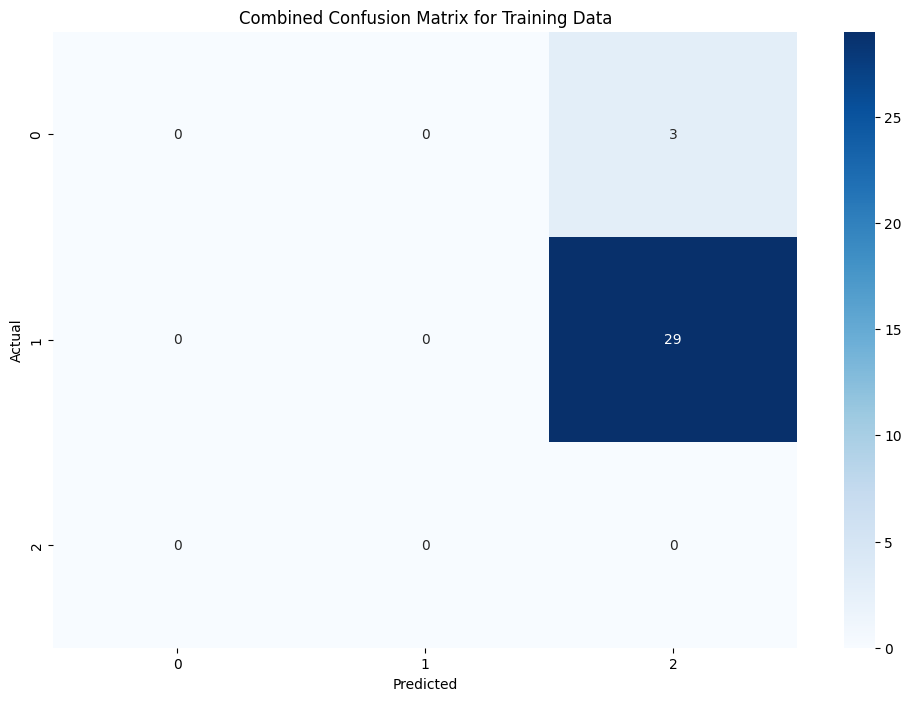

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Training predictions for each model
svm_preds_train = svm_model.predict(X_train)
nb_preds_train = nb_model.predict(X_train)
rf_preds_train = rf_model.predict(X_train)

# Aggregating predictions
combined_preds_train = np.vstack((svm_preds_train, nb_preds_train, rf_preds_train)).T

# Voting: Taking the mode (most frequent prediction) as the final prediction
from scipy.stats import mode

final_preds_train = mode(combined_preds_train, axis=1)[0].flatten()

# Computing the combined confusion matrix
combined_cf_matrix_train = confusion_matrix(y_train, final_preds_train)

print("Combined Confusion Matrix for Training Data:")
print(combined_cf_matrix_train)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(combined_cf_matrix_train, annot=True, fmt="d", cmap="Blues")
plt.title("Combined Confusion Matrix for Training Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
